In [2]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.25, '신뢰구간 모평균에 대한 95% : \n$\\left( \\overline{x}-\\overline{y}\\right)$-1.96$\\sqrt{\\dfrac{\\sigma_{1}^{2}}{n}+\\dfrac{\\sigma_{2} ^{2}}{m}}$ , $\\left( \\overline{x}-\\overline{y}\\right)$+ 1.96$\\sqrt{\\dfrac{\\sigma_{1}^{2}}{n}+\\dfrac{\\sigma_{2} ^{2}}{m}}$')

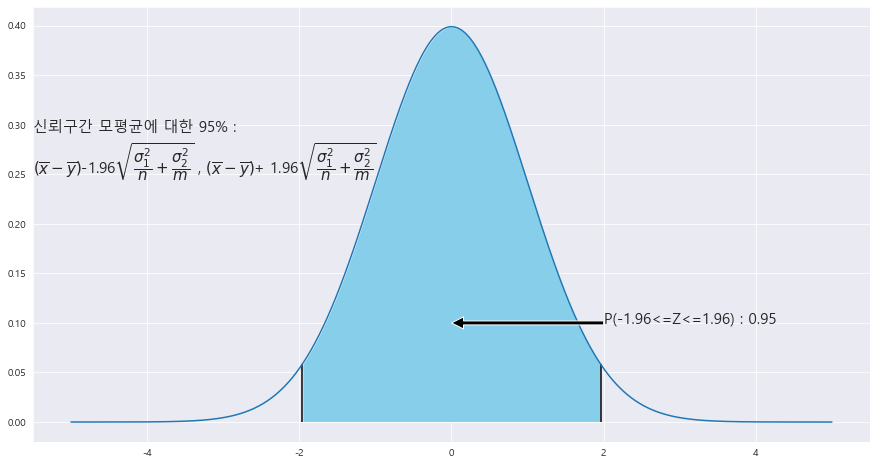

In [3]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[93.242, 89.635, 92.66, 92.54, 94.883, 102.165, 93.326, 90.88, 93.684, 91.564, 88.727, 94.317, 88.166, 96.085, 82.028, 97.213, 99.338, 93.381, 86.498, 83.348, 97.262, 89.656, 84.045, 89.113, 81.562, 87.18, 94.345, 92.436, 93.633, 97.276]
0.33351191674861236


Text(2, 0.35, '$\\overline{X} = $91.673\n$\\sigma = $0.932\n$\\sqrt{n} = $5.48')

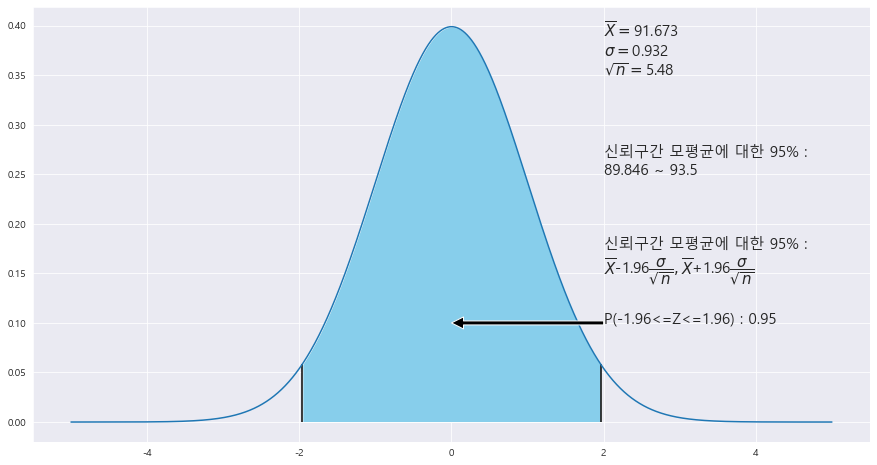

In [4]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)

ex = '93.242 89.635 92.660 92.540 94.883 102.165 93.326 90.880 93.684 91.564 88.727 94.317 88.166 96.085 82.028 97.213 99.338 93.381 86.498 83.348 97.262 89.656 84.045 89.113 81.562 87.180 94.345 92.436 93.633 97.276'
A = list(map(float, ex.split(' ')))
print(A)
MEANS = round(np.mean(A) ,3)

VARS = 5.105**2
STDS = round(math.sqrt(VARS/len(A)),3)
print((z_1 * STDS / math.sqrt(len(A))))
ax.text(2 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + f'{round(MEANS - (z_1 * STDS ),3)} ~ {round(MEANS + (z_1 * STDS ),3)}' , fontsize= 15)


ax.text(2 , .35,  r'$\overline{X} = $' + f'{MEANS}\n' +  r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(len(A)),2)}',fontsize=15)

In [5]:
print( (2* 1.96 *20 / 8)**2)

96.04000000000002


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.15, '신뢰구간 모평균에 대한 90% : \n$\\overline{X}$-1.645$\\dfrac{\\sigma}{\\sqrt{n}},\\overline{X}$+1.645$\\dfrac{\\sigma}{\\sqrt{n}}$')

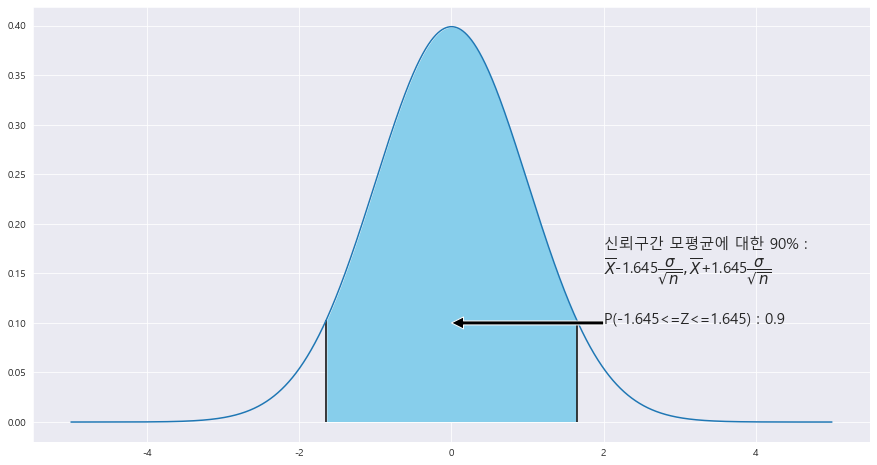

In [6]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 90 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)

# ex = '93.242 89.635 92.660 92.540 94.883 102.165 93.326 90.880 93.684 91.564 88.727 94.317 88.166 96.085 82.028 97.213 99.338 93.381 86.498 83.348 97.262 89.656 84.045 89.113 81.562 87.180 94.345 92.436 93.633 97.276'
# A = list(map(float, ex.split(' ')))
# print(A)
# MEANS = round(np.mean(A) ,3)
#
# VARS = 5.105**2
# STDS = round(math.sqrt(VARS/len(A)),3)
# print((z_1 * STDS / math.sqrt(len(A))))
# ax.text(2 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + f'{round(MEANS - (z_1 * STDS ),3)} ~ {round(MEANS + (z_1 * STDS ),3)}' , fontsize= 15)
#
#
# ax.text(2 , .35,  r'$\overline{X} = $' + f'{MEANS}\n' +  r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(len(A)),2)}',fontsize=15)

In [7]:
print( (2*1.645*2/0.2)**2)

1082.4099999999999


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.35, '$\\sigma_{1} = $0.01\n$\\sigma_{2} = $0.02\n신뢰구간 d = 0.005')

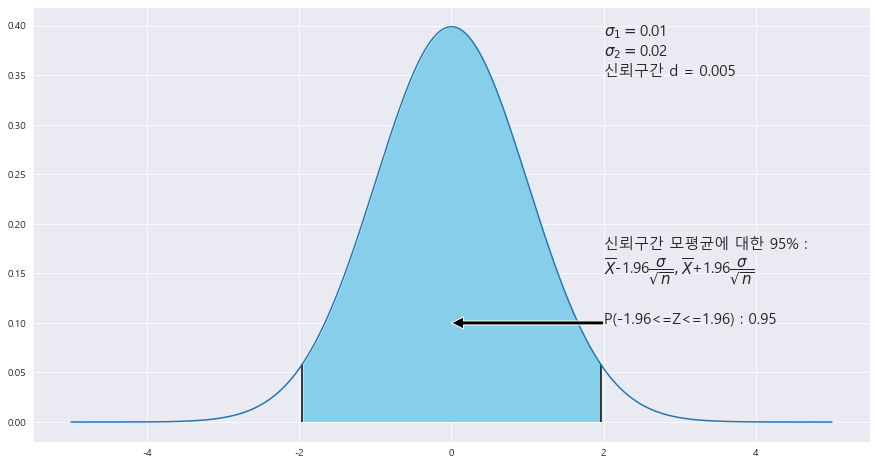

In [10]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)

# ex = '93.242 89.635 92.660 92.540 94.883 102.165 93.326 90.880 93.684 91.564 88.727 94.317 88.166 96.085 82.028 97.213 99.338 93.381 86.498 83.348 97.262 89.656 84.045 89.113 81.562 87.180 94.345 92.436 93.633 97.276'
# A = list(map(float, ex.split(' ')))
# print(A)
# MEANS = round(np.mean(A) ,3)
#
# VARS = 5.105**2
# STDS = round(math.sqrt(VARS/len(A)),3)
# print((z_1 * STDS / math.sqrt(len(A))))
# ax.text(2 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + f'{round(MEANS - (z_1 * STDS ),3)} ~ {round(MEANS + (z_1 * STDS ),3)}' , fontsize= 15)
#
#ax.text(2 , .35,  r'$\overline{X} = $' + f'{MEANS}\n' +  r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(len(A)),2)}',fontsize=15)
ax.text(2 , .35,  r'$\sigma_{1} = $' + f'{0.01}\n'+ r'$\sigma_{2} = $' + f'{0.02}\n'  + f'신뢰구간 d = {0.005}',fontsize=15)

In [9]:
print(4 * 1.96**2 * (0.01**2 + 0.02**2) / 0.005**2)

307.328


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


66.64


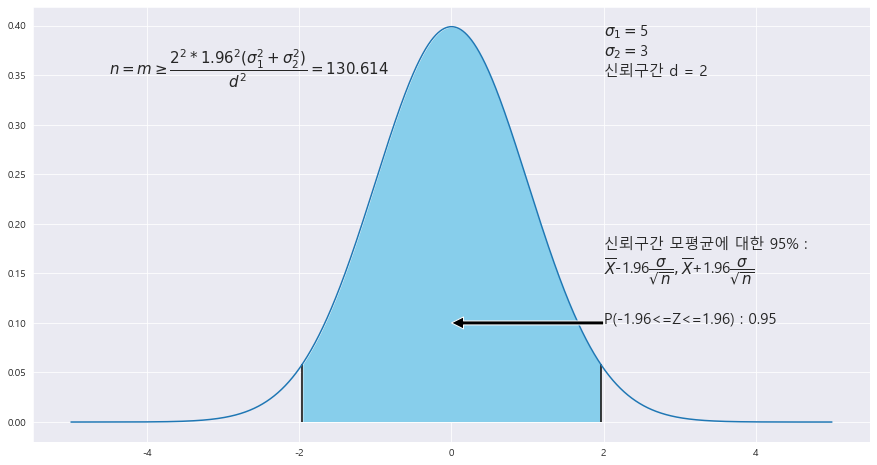

In [46]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)

d = 2 # 신뢰구간
o1 = 5 #모 표준편차 1
o2 = 3 #모 표준편차 2
ax.text(2 , .35,  r'$\sigma_{1} = $' + f'{o1}\n'+ r'$\sigma_{2} = $' + f'{o2}\n'  + f'신뢰구간 d = {d}',fontsize=15)
c = 2**2 * z_1**2*(o1**2 + o2**2) / d**2
ax.text(-4.5 , .35,  r'$n=m\geq\dfrac{{%2d}^{2}*{%.2f}^{2}(\sigma^2_{1} + \sigma^2_{2})}{d ^{2}} = {%.3f}$'% (2 , z_1 ,c) ,fontsize=15)
print(4*z_1 * (5**2 + 3**2) / 2**2)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


66.64


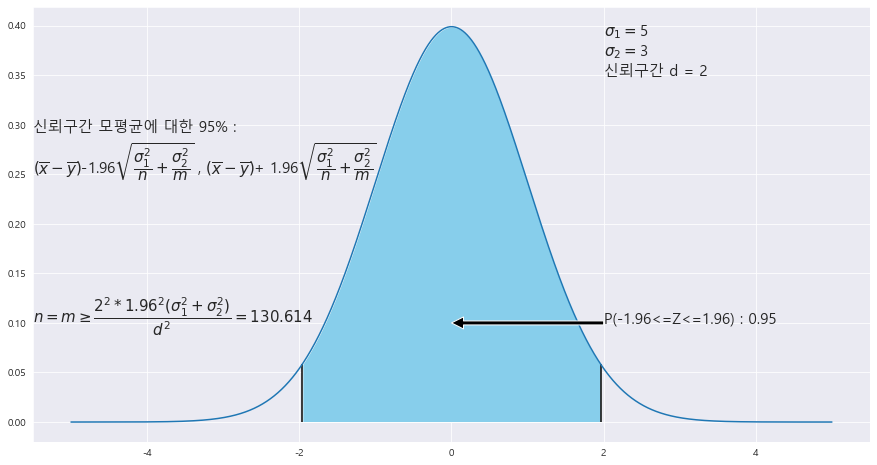

In [50]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

d = 2 # 신뢰구간
o1 = 5 #모 표준편차 1
o2 = 3 #모 표준편차 2
ax.text(2 , .35,  r'$\sigma_{1} = $' + f'{o1}\n'+ r'$\sigma_{2} = $' + f'{o2}\n'  + f'신뢰구간 d = {d}',fontsize=15)
c = 2**2 * z_1**2*(o1**2 + o2**2) / d**2
ax.text(-5.5 , .1,  r'$n=m\geq\dfrac{{%2d}^{2}*{%.2f}^{2}(\sigma^2_{1} + \sigma^2_{2})}{d ^{2}} = {%.3f}$'% (2 , z_1 ,c) ,fontsize=15)
print(4*z_1 * (5**2 + 3**2) / 2**2)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


55.93


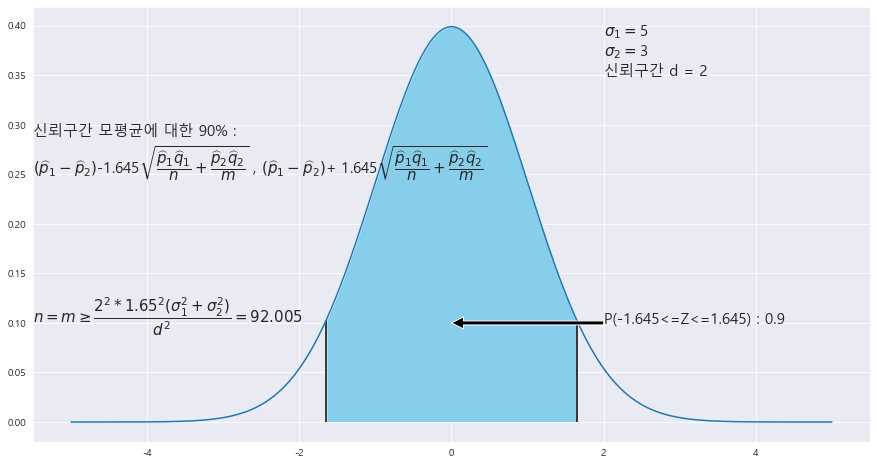

In [51]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 90#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$' +' , '+ r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$',fontsize=15)

d = 2 # 신뢰구간
o1 = 5 #모 표준편차 1
o2 = 3 #모 표준편차 2
ax.text(2 , .35,  r'$\sigma_{1} = $' + f'{o1}\n'+ r'$\sigma_{2} = $' + f'{o2}\n'  + f'신뢰구간 d = {d}',fontsize=15)
c = 2**2 * z_1**2*(o1**2 + o2**2) / d**2
ax.text(-5.5 , .1,  r'$n=m\geq\dfrac{{%2d}^{2}*{%.2f}^{2}(\sigma^2_{1} + \sigma^2_{2})}{d ^{2}} = {%.3f}$'% (2 , z_1 ,c) ,fontsize=15)
print(4*z_1 * (5**2 + 3**2) / 2**2)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.35, '사전정보 p가 있는 경우 n$\\geq\\dfrac{4*z^2_{a/2}*{p}*{(1-p)}}{d^2}$')

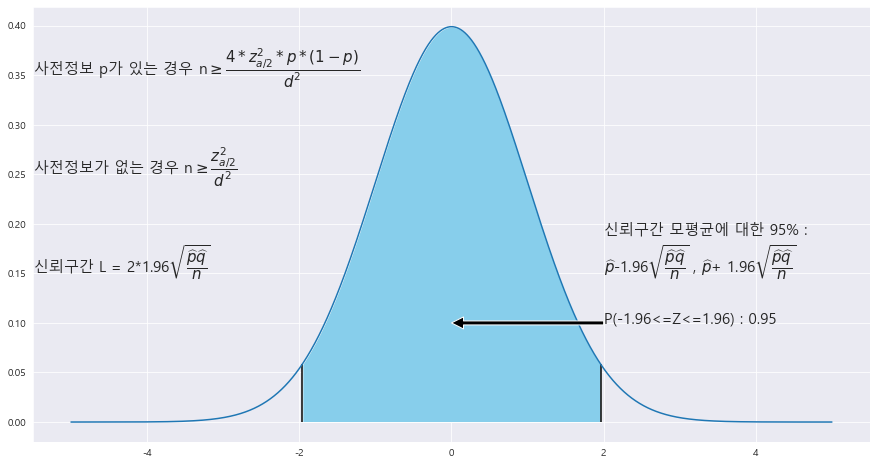

In [76]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)
#\widehat{p}-\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}


ax.text(-5.5 , .15, f'신뢰구간 L = 2*{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)

#
ax.text(-5.5 , .25, f'사전정보가 없는 경우 n' + r'$\geq\dfrac{z^2_{a/2}}{d^2}$',fontsize=15)

ax.text(-5.5 , .35, f'사전정보 p가 있는 경우 n' + r'$\geq\dfrac{4*z^2_{a/2}*{p}*{(1-p)}}{d^2}$',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.35, '사전정보 p가 있는 경우 n$\\geq\\dfrac{4*z^2_{a/2}*{p}*{(1-p)}}{d^2}$')

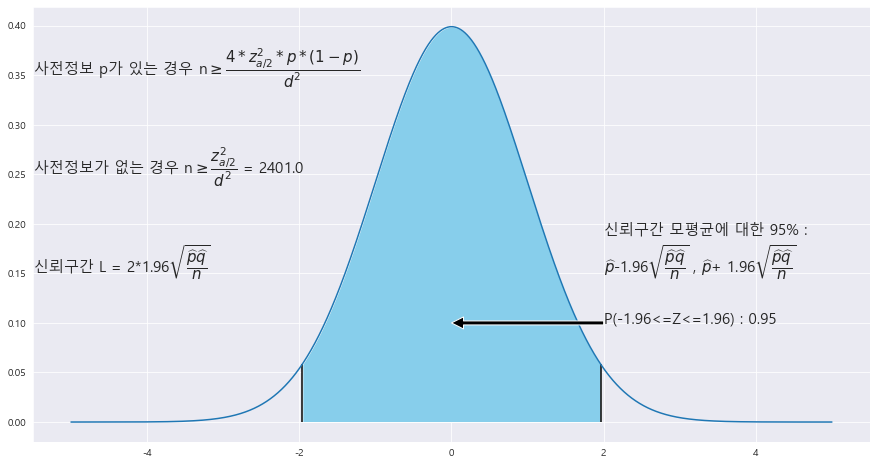

In [79]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)
#\widehat{p}-\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}


ax.text(-5.5 , .15, f'신뢰구간 L = 2*{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)

d = 0.02 *2
ax.text(-5.5 , .25, f'사전정보가 없는 경우 n' + r'$\geq\dfrac{z^2_{a/2}}{d^2}$' + f' = {round(z_1**2 / d**2,2)}',fontsize=15)

ax.text(-5.5 , .35, f'사전정보 p가 있는 경우 n' + r'$\geq\dfrac{4*z^2_{a/2}*{p}*{(1-p)}}{d^2}$',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.35, '사전정보 p가 있는 경우 n$\\geq\\dfrac{4*z^2_{a/2}*{p}*{(1-p)}}{d^2}$= 1055 ')

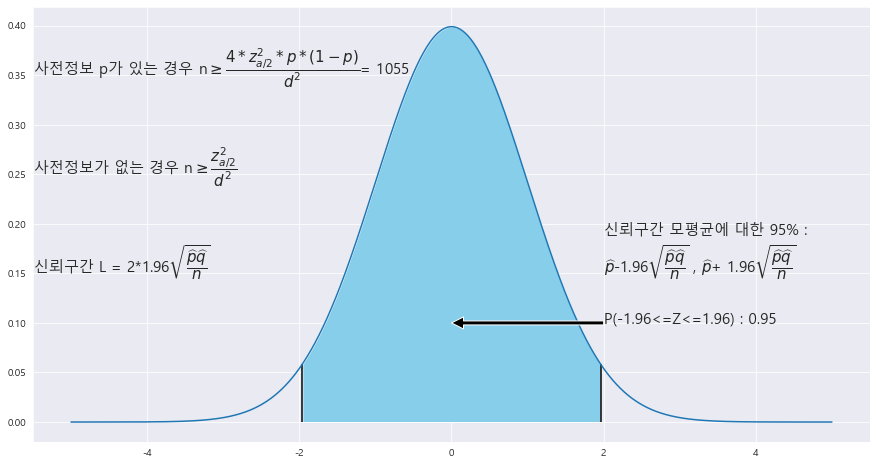

In [81]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)
#\widehat{p}-\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}


ax.text(-5.5 , .15, f'신뢰구간 L = 2*{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)

d = 0.025 *2
p = 0.78
ax.text(-5.5 , .25, f'사전정보가 없는 경우 n' + r'$\geq\dfrac{z^2_{a/2}}{d^2}$',fontsize=15)

ax.text(-5.5 , .35, f'사전정보 p가 있는 경우 n' + r'$\geq\dfrac{4*z^2_{a/2}*{p}*{(1-p)}}{d^2}$' + f'= {round(4 * z_1**2 * p * (1-p) / d**2)} ' ,fontsize=15)